## Clipping Outliers: NYC hotel pricing dataset analysis

Sometimes, while analyzing a dataset, there can be some data present which might exert undue influence while building models, like linear regression. These data are called outliers. Outliers can sometimes mislead the set of data and influence model performance as well.

`What are outliers?`

In data science, outliers are values within a dataset that vary greatly from the others, they are either much larger, or significantly smaller. Outliers can appear in a dataset due to variability of measurement, error in data, experimental error etc.  Outliers can cause machine learning models to make inaccurate predictions when they are included in the training data, so they need to be handled before training a model.

One of the best ways to understand outliers is box plots. 

Boxplots are very useful to see the distribution of a variable/feature and detect outliers in them.  It is a useful graphical representation for describing the behavior of the data in the middle as well as both ends of the distribution. A box plot shows the data based on the five-number summary: **the minimum(Q0)**, **the first(Q1) quartertile**, **the sample median(Q2)**, **the third quartile(Q3)** and **the maximum(Q4)**. 

- **Minimum:** the lowest data point in a variable excluding any outliers
- **Median (Q2 or 50th percentile):** the middle value in the variable
- **First quartile (Q1 or 25th percentile):** also known as the lower quartile (0.25)
- **Third quartile (Q3 or 75th percentile):** also known as the upper quartile (0.75)
- **Maximum:** the highest data point in the variable excluding any outliers

The difference between the lower quartile and the upper quartile(Q3 - Q1) is called the **interquartile range** or **IQR**. 

Boxplots help us find the outliers in the data by using the IQR. As a rule, values that are outside the range of 1.5*IQR from Q1 and Q3 are regarded as outliers. The below image will help us better understand the outliers in our data.  

<img src="../boxplot.png"
     alt="boxplot icon"
     width="500" 
     height="300"
     style="margin-right: 10px;" />

In the image above, the points that are outside the whisker lines are the outliers.

There are different techniques to handle outliers in a dataset. In our example, we will use the concept of clipping (winsorizing).

`What is winsorizing/clipping?`

Clipping data from a dataset means to clip the data at the last permitted extreme value, e.g. the 5th or 95th percentile value. For example, when we clip the data to 95th percentile, values over the 95th percentile will be set to the 95th percentile value meaning all the values greater than 95% percent will equal to the 95th percentile value. 

The following data set has several (bolded) extremes:
- {**0.1, 1,** 12, 14, 16, 18, 19, 21, 24, 26, 29, 32, 33, 35, 39, 40, 41, 44, **99, 125**}

After clipping/winsorizing the top and bottom 10% of the data(matching those values to the nearest extreme), we get:
- {**12, 12,**12, 14, 16, 18, 19, 21, 24, 26, 29, 32, 33, 35, 39, 40, 41, 44, **44, 44**}

Let us solve a problem that removes outliers from data using clipping.


## Problem Description

For illustration of the clipping method, lets look at an example. 

We have a dataset named **nyc_airbnb.csv** , which contains data about price of AirBnb per-night rental houses. In the dataset, there exists some outliers in the `price` column. Our task is to find out the outliers and handle them by winsorizing/clipping. 


First , we load our dataset "New York Housing" into a dataframe and view it.

### Load the Dataset and View data

The steps are:
    
- import the `pandas` library 
- load the data into a variable `nyc` using `read_csv` method in pandas 
- view the variable `nyc`.   

In [16]:
import pandas as pd
nyc=pd.read_csv("../datasets/nyc_airbnb.csv")

In [17]:
nyc

id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
4      -73.94399  Entire home/apt     80              10                  9   
...          ...              ...    ...             ...                ...   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2018-10-19               0.21                               6   
1      2019-05-21               0.38                               2   
2             NaN                NaN                               1   
3      2019-07-05               4.64                               1   
4      2018-11-19               0.10                               1   
...           ...                ...                             ...   
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
0                   365  
1                   355  
2                   365  
3                   194  
4                     0  
...                 ...  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23  

[48895 rows x 16 columns]

## Check for outliers in `price` data






### Plot a strip plot for outlier estimation:




The steps are:
- import the `plotly.express` library as `px`
- using `px`, call the `strip()` method to generate the strip plot
- inside the method, the parameters will be,
    - `nyc`: variable where the data is stored
    - `price`: column data to plot in the y axis
- store the result into a variable `price_strip` that will save the plot in this variable
- display the variable `price_strip` using the `show()` method 

In [18]:
import plotly.express as px

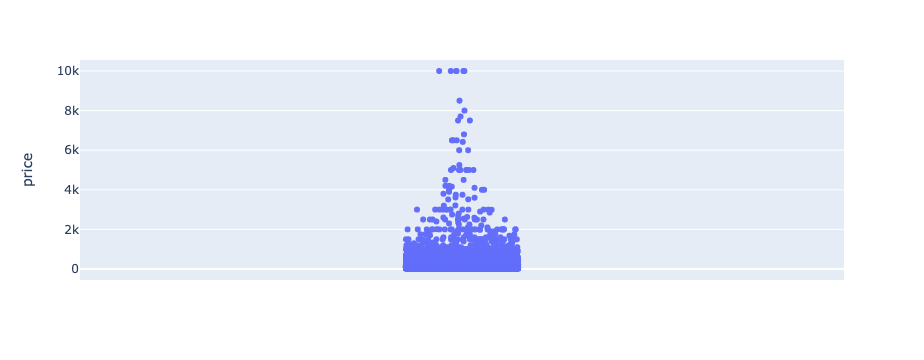

In [19]:
price_strip = px.strip(nyc, y='price')

price_strip.show()


#### Use boxplot to estimate outliers:

The steps are:

- call the `boxplot()` method to generate the boxplot
- inside the method, the parameters will be,
    - `column`: the column data to plot for the boxplot 
    - `figsize`(optional): to define the size of the figure in terms of width and height
    - `fontsize`(optional): to show the texts size in the figure
    - `vert`(optional): the allignment(x or y axis) of the plot. Value `False` means horizontal(x axis) alignment, `True` vertical alignment 
- apply the `boxplot()` method to the variable `nyc`, where our data is stored    
- store the result in a variable `box_price`    
- use the `box_price` variable to display the boxplot    


<AxesSubplot:>

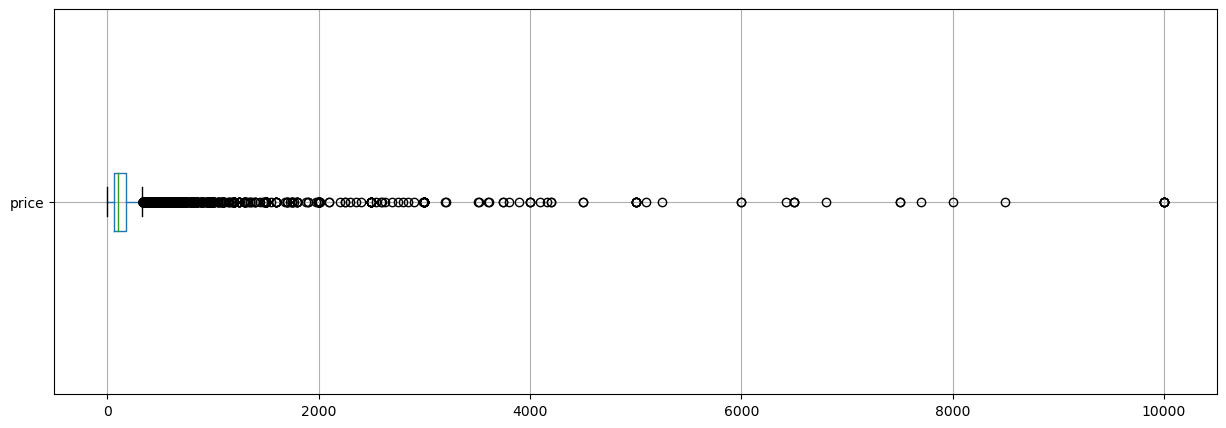

In [25]:
box_price = nyc.boxplot(column='price', figsize=(15,5), fontsize='10', vert=False)

box_price

### Use `describe()` for `price` distribution in terms of numbers:



The steps are:

- select the `price` column from the variable `nyc`
- use the `describe()` method on the price data. This will show the `price` data distribution on the five number summary  

In [6]:
nyc['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

### Find the Outliers:

#### Calculate Q3:

The steps are:
 - select the `price` column from the variable `nyc`
 - use the `quantile()` method on the price data
 - inside the quantile method, the parameter will be,
     - the percentile value whose datapoint we want to find(75% for q3)
 - store the result in a variable `q3`  
 - print the variable `q3`

In [7]:
q3= nyc['price'].quantile(0.75)

print("q3:",q3)

q3: 175.0


#### Calculate Q1:

The steps are:
 - select the `price` column from the variable `nyc`
 - use the `quantile()` method on the price data
 - inside the quantile method, the parameter will be,
     - the percentile value whose datapoint we want to find(25% for q1)
 - store the result in a variable `q1`  
 - print the variable `q1`

In [8]:
## find the 25th percentile value
q1= nyc['price'].quantile(0.25)

print("q1:",q1)


q1: 69.0


#### Find the interquartile range (IQR):

The steps are:
- substract `q3` from `q1`
- store the result in a variable `iqr`
- print the variable `iqr`

In [9]:
iqr= q3 - q1

print("iqr:",iqr)

iqr: 106.0


#### Calculate the upper and lower bound for outliers:

The steps are:

for `upper bound`,
- define the range q3 + 1.5*iqr
- store it in a variable `upper_bound`
- print the `upper_bound`

for `lower bound`,
- define the range q1 - 1.5*iqr
- store it in a variable `lower_bound`
- print the `lower_bound`

In [10]:
upper_bound= q3 + 1.5*iqr

print("upper bound",upper_bound)

lower_bound= q1 - 1.5*iqr

print("lower bound",lower_bound)

upper bound 334.0
lower bound -90.0


## Clip the Outliers:

### Find the clipping points:

The steps are:

for `lower_point`,

- use the max() function
- the function parameters will be,
    - `lower_bound`: calculated in the previous step
    - `nyc['price'].min()` : the minimum value in the `nyc['price']` data
    - store that function into variable `lower_point`
- print the variable `lower_point`

for `upper_point`,

- use the min() function
- the function parameters will be,
    - `upper_bound`: calculated in the previous step
    - `nyc['price'].max()` : the maximum value in the `nyc['price']` data 
    - store that function into variable `upper_point`
- print the variable `upper_point`    

#### Clipping bound:

In [11]:
lower_point= max(lower_bound,nyc['price'].min())

print("lower_point", lower_point)

upper_point= min(upper_bound,nyc['price'].max())

print("upper_point", upper_point)

lower_point 0
upper_point 334.0


### Clip outliers using the clipping points:

The steps are:
- select the `price` column from `nyc` dataframe
- call the `clip()` method on the `price` column
- in the method, set the parameters as,
    - `lower_point`: the lower point of price data
    - `upper_point`: the upper point of price data
- set the result to the `price` column of `nyc` dataframe to make the changes permanent 

In [12]:
nyc['price'] = nyc['price'].clip(lower_point, upper_point)

## Check final clipped data:

The steps are:
- select the `price` column from the variable `nyc`
- use the `describe()` method on the `price` data 

In [13]:
nyc['price'].describe()

count    48895.000000
mean       132.979753
std         83.530504
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max        334.000000
Name: price, dtype: float64

## Distribution after clipping data  



#### Using strip plot:

The steps are:

- using `px`, call the `strip()` method to generate the strip plot
- inside the method, the parameters will be,
    - `nyc`: variable where the data is stored
    - `price`: column data to plot in the y axis
- store the result into a variable `price_strip2` that will save the plot in this variable
- display the variable `price_strip2` using the `show()` method 

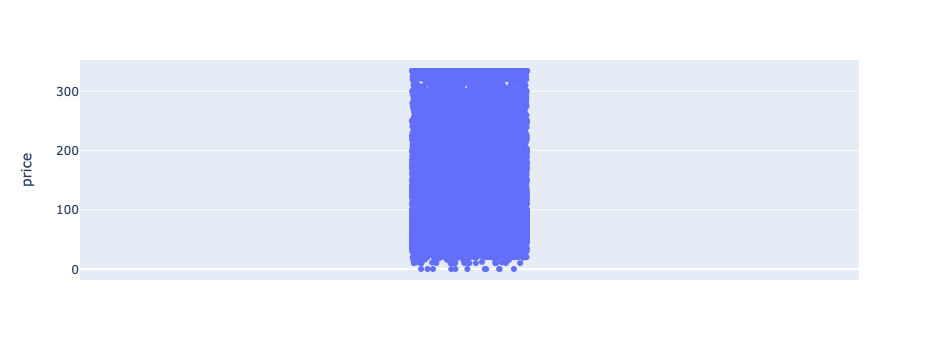

In [14]:
# plt.scatter(x= nyc.index, y= nyc['price'])
# #plt.hist(nyc['price'],20)
# plt.show()

final= px.strip(nyc, y='price')
final.show()

#### Using boxplot:

The steps are:

- call the `boxplot()` method to generate the boxplot
- inside the method, the parameters will be,
    - `column`: the column data to plot for the boxplot 
    - `figsize`(optional): to define the size of the figure in terms of rows and columns
    - `fontsize`(optional): to show the texts size in the figure
    - `vert`(optional): the allignment(x or y axis) of the plot. Value `False` means horizontal(x axis) alignment, `True` vertical alignment 
- apply the `boxplot()` method to the variable `nyc`, where our data is stored    
- store the result in a variable `box_price2`    
- use the `box_price2` variable to display the boxplot    


<AxesSubplot:>

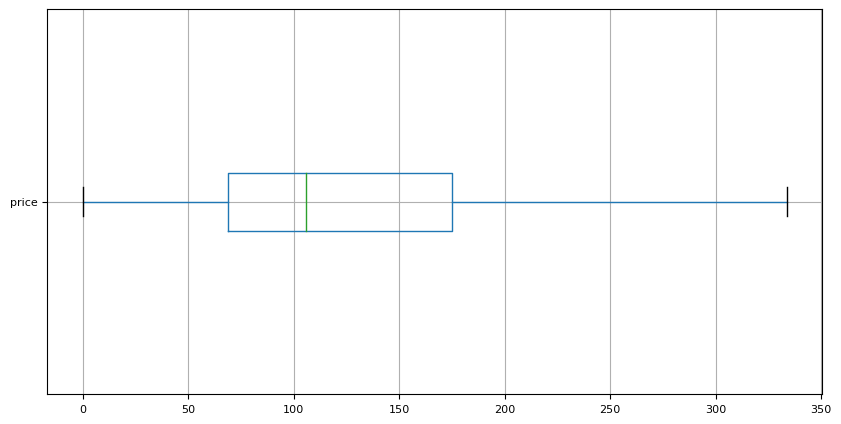

In [15]:
box_price2= nyc.boxplot(column='price', figsize=(10,5), fontsize='8', vert=False)
box_price2

### Conclusion

By using the clip method, we have removed our outliers from the price data. Now using this dataset will give us good predictions of hotel prices. 